In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data_df = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

In [4]:
#### feature를 컬럼으로 DataFrame 생성
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

## RandomForestClassifier 모델 생성. 결정트리갯수는 100
rf_model = RandomForestClassifier(n_estimators=100)

## 학습시킴
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2

## RandomForestClassifier 모델 생성. 결정트리갯수는 100

## 학습시킴



In [7]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
print(f'Training DataSet Accuracy {rf_model.score(X_train,y_train)}')
print(f'Test DataSet Accuracy {round(rf_model.score(X_test,y_test),3)}')

Training DataSet Accuracy 1.0
Test DataSet Accuracy 0.956


In [8]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함



In [9]:
## 하이퍼 파라미터값을 지정
## max_features=2
## max_depth=5
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, max_depth=5)

## 오버핏팅이 다소 줄어들고 정확도가 조금 올라가는 것을 확인하자
rf_model.fit(X_train,y_train)
print(f'{rf_model.score(X_train,y_train)}')
print(f'{rf_model.score(X_test,y_test)}')

0.9956043956043956
0.9736842105263158


In [10]:
## 하이퍼 파라미터값을 지정
## max_features=2
## max_depth=5
## 오버핏팅이 다소 줄어들고 정확도가 조금 올라가는 것을 확인하자




In [11]:
print('특성 중요도:\n{}'.format(rf_model.feature_importances_))

특성 중요도:
[0.07133565 0.01165946 0.03784711 0.05423878 0.01431208 0.04239785
 0.06394665 0.04885236 0.00808274 0.00941079 0.02680361 0.00317869
 0.03113578 0.05702595 0.00580648 0.00806075 0.01357105 0.01115357
 0.00553693 0.00593672 0.09003628 0.02006253 0.06801637 0.07769517
 0.01535092 0.02464996 0.04514845 0.10378376 0.01611007 0.00885349]


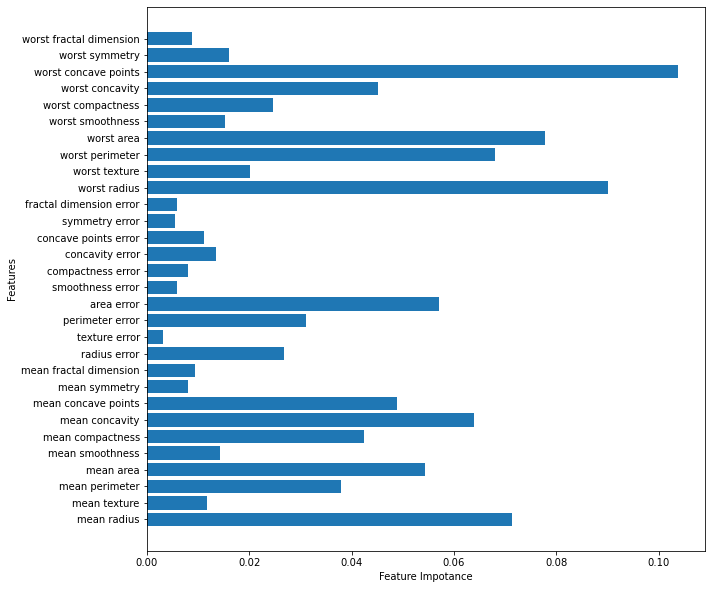

In [12]:
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(10,10))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    #plt.ylim(-1, n_features) # 그림의 범위를 수동으로 지정할때
    
plot_feature_importances_cancer(rf_model)

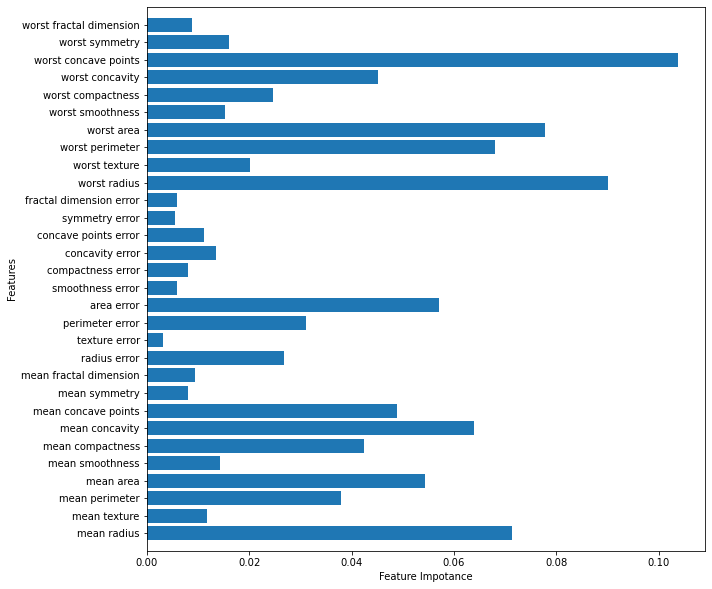

In [13]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(10,10))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(rf_model)

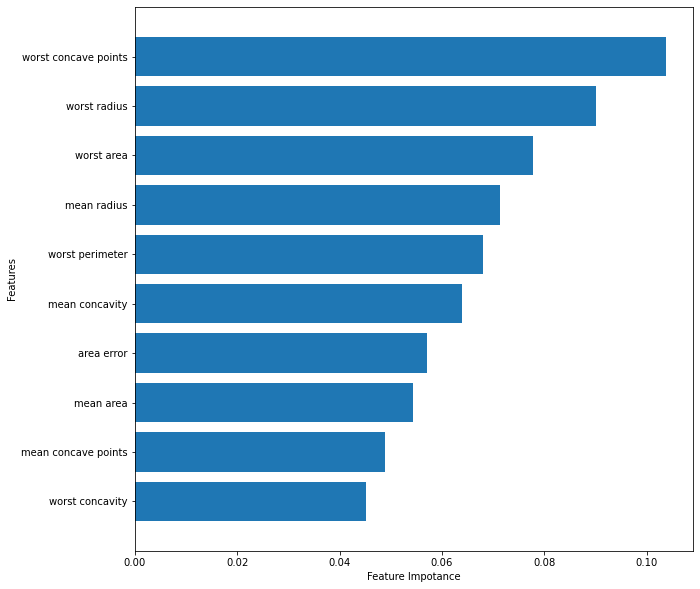

In [14]:
def plot_feature_importances_cancer(model):
    a = {model.feature_importances_[idx] : i for idx, i in enumerate(cancer.feature_names)}
    top = sorted(model.feature_importances_, reverse=False)[-10:]
    top10 = [a[i] for i in top]
    
    plt.figure(figsize=(10,10))
    n_features = cancer.data.shape[1]
    plt.barh(range(10), top , align='center')
    plt.yticks(np.arange(10),np.array(top10))
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, 10)
    
plot_feature_importances_cancer(rf_model)

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {'max_depth' : [1,3,4,6,10,15]}
grid_rf = GridSearchCV(RandomForestClassifier(n_estimators=100) , params , cv=5, )

In [17]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 4, 6, 10, 15]})

In [18]:
df = pd.DataFrame(grid_rf.cv_results_)

In [19]:
df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,1,0.918681
1,3,0.934066
2,4,0.949451
3,6,0.960440
4,10,0.956044
5,15,0.956044


In [20]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자
a = df[['param_max_depth','mean_test_score']]
print(f'{a}')

  param_max_depth  mean_test_score
0               1         0.918681
1               3         0.934066
2               4         0.949451
3               6         0.960440
4              10         0.956044
5              15         0.956044
